In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import confusion_matrix

In [2]:
#1 load dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#2. extract data from outcome column is a variable y
y = data[['Outcome']]

In [8]:
#3. extract data from outcome column is a variable y
x = data.drop(['Outcome'], axis=1)

In [9]:
#4.divide taining and tesing data in 70-30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [10]:
#5. creating model
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#6. Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [12]:
#7. Creating the Confusion matrix   
cm= confusion_matrix(y_test, y_pred)  
cm

array([[113,  33],
       [ 32,  53]])

[Text(296.77774390243906, 420.384, 'X[1] <= 0.208\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(104.11463414634146, 391.392, 'X[5] <= -0.703\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(32.66341463414634, 362.4, 'X[5] <= -2.965\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(16.33170731707317, 333.408, 'X[1] <= -0.208\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(8.165853658536586, 304.416, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(24.49756097560976, 304.416, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(48.99512195121952, 333.408, 'X[6] <= 0.603\nentropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(40.829268292682926, 304.416, 'entropy = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(57.1609756097561, 304.416, 'X[6] <= 0.713\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(48.99512195121952, 275.424, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(65.32682926829268, 275.424, 'entropy = 0.0\nsamples = 14\nval

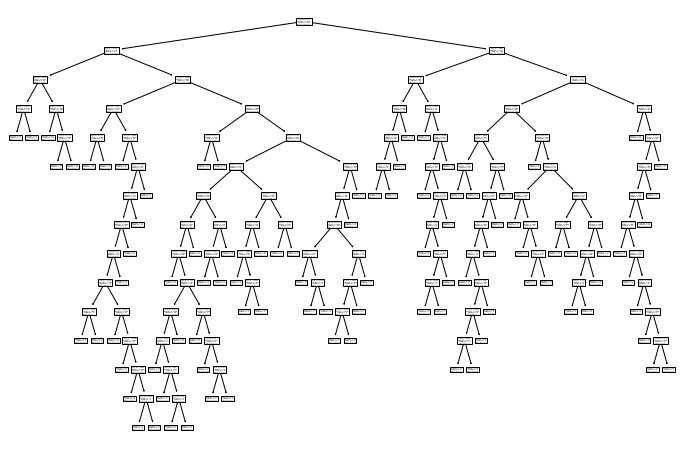

In [14]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(x_train, y_train)) 

In [23]:
#Predict the value using X train for accuracy comparision 
y_pred_train_entrophy = classifier.predict(x_train)

y_pred_train_entrophy

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [31]:
from sklearn.metrics import accuracy_score, classification_report ,f1_score
print('Model accuracy score with criterion entrophy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion entrophy index: 0.7186
Training-set accuracy score: 1.0000


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       146
           1       0.62      0.62      0.62        85

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [34]:
#with gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(334.8, 380.52, 'X[1] <= 0.272\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(167.4, 271.8, 'X[5] <= -0.722\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(83.7, 163.07999999999998, 'X[5] <= -2.965\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(41.85, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(251.10000000000002, 163.07999999999998, 'X[7] <= -0.486\ngini = 0.397\nsamples = 260\nvalue = [189, 71]'),
 Text(209.25, 54.360000000000014, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]'),
 Text(292.95, 54.360000000000014, 'gini = 0.474\nsamples = 140\nvalue = [86, 54]'),
 Text(502.20000000000005, 271.8, 'X[5] <= -0.52\ngini = 0.478\nsamples = 180\nvalue = [71, 109]'),
 Text(418.5, 163.07999999999998, 'X[1] <= 0.785\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.1\nsamples = 19\nvalue =

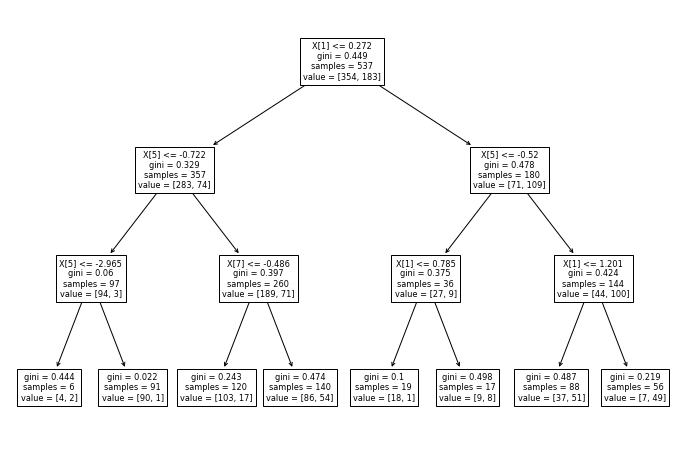

In [35]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [37]:
y_pred_gini = clf_gini.predict(x_test)

y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [38]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.7576
Training-set accuracy score: 0.7635
